**NAMA  : MUHAMMAD REZA ADI NUGRAHA**

**NIM   : 1301204078**

**KELAS : IF-44-05**


# **[0] LIBRARY 📚**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# **[1] DATA EXPLORATION 📊**

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal. Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. 

* **Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia, and class 16 refers to the rest of unclassified ones.**

For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

The names and id numbers of the patients were recently removed from the database.

## **Load Dataframe**

* 0 = Normal ECG
* 1 = Different Classes of Arrhythmia
* 2 = Unclassified

In [ ]:
# Simpan dataframe pada variable df
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data", header=None)

# Ubah kolom target menjadi lebih umum
index = 0
for value in df[279]:
  if value == 1:
    df[279][index] = 0
  elif value > 1 and value < 16:
    df[279][index] = 1
  else:
    df[279][index] = 2
  index += 1

# Jumlah baris dan kolom dataframe
print(df.shape)
df

(452, 280)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,0
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,1
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,1
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,0


## **Data Explorartion**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,0.506637
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,0.589976
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,0.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,0.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,0.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,1.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,2.000000


In [ ]:
print("Apakah ada nilai NaN? ", df.isnull().values.any())

Apakah ada nilai NaN?  False


In [ ]:
df.head

<bound method NDFrame.head of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  2

In [ ]:
def fill_nan(data):
  '''
  Fungsi untuk mengubah data NaN dalam dataframe yang berupa string "?" menjadi NaN
  Tujuan fungsi adalah untuk mempermudah pengolahan data menggunakan Pandas
  '''
  # Untuk setiap kolom di dalam data
  for column in data:
    # Untuk simpan index data yang memiliki nilai "?"
    index = 0
    # Menyimpan kumpulan index sebelumnya
    list_index = []
    # Untuk setiap value dalam kolom
    for value in data[column]:
      # Jika value memiliki nilai "?"
      if value == "?":
        # Simpan index di list
        list_index.append(index)
      index += 1
    # Untuk setiap index di dalam list_index
    for idx in list_index:
      # Ubah data menjadi None
      data[column][idx] = None
  return data

In [ ]:
df = fill_nan(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print("Apakah ada nilai NaN? ", df.isnull().values.any())

Apakah ada nilai NaN?  True


Text(0, 0.5, 'Jumlah Data')

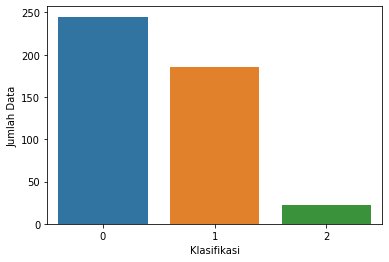

In [ ]:
fig = sns.countplot(x=279, data=df)
plt.xlabel("Klasifikasi")
plt.ylabel("Jumlah Data")

# **[2] DATA PREPARTION 🔎**

## **Drop Irelevant Column**

In [ ]:
def drop_irelevant_column(data):
  '''
  Fungsi yang digunakan untuk melakukan drop kolom yang hanya memiliki nilai yang sama
  Kolom yang memiliki nilai yang sama memiliki information gain rendah, sehingga tidak membedakan kelas
  Tujuan dari fungsi ini adalah untuk mereduksi dimensi dataframe
  '''
  # Untuk setiap kolom di data
  for column in data:
    # Jika jumlah data yang unik jumlahnya 1
    if len(data[column].unique()) == 1:
      # Drop data dari dataframe, karena tidak memiliki pengaruh. 
      data.drop(column, axis=1, inplace=True)
  return data

In [ ]:
# Gunakan fungsi pada variable df
df = drop_irelevant_column(df)
# Jumlah baris dan kolom setelah drop kolom yang tidak relevan
print(df.shape)
df

(452, 263)


,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,0
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,1
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,1
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,0


## **Fill NaN with Median**

In [ ]:
def replace_nan(data):
  '''
  Fungsi untuk mengubah nilai NaN dalam dataframe menjadi nilai median kolom tersebut
  '''
  # Panggil fungsi fill_nan untuk mengubah "?" menjadi NaN
  data = fill_nan(data)
  # Untuk setipa kolom di dalam data
  for column in data:
    # Mencari nilai mean dari kolom
    if len(data[column].unique()) != 2:
      median = data[column].median()
      # Isi setiap data yang NaN dengan median
      data[column].fillna(value=median, inplace=True)

In [ ]:
# Panggil fungsi fill_nan untuk mengubah "?" menjadi NaN
df = fill_nan(df)
# Cek apakah ada data NaN
print("Sebelum replace NaN: ", df.isnull().values.any())
# Ubah semua data menjadi numeric, karena sebelumnya "?" dianggap string, sehingga semua data pada kolom itu string
df = df.apply(pd.to_numeric)
# Panggil fungsi replace NaN pada df
replace_nan(df)
# Cek apakah ada data NaN
print("Setelah replace NaN: ", df.isnull().values.any())
df

Sebelum replace NaN:  True
Setelah replace NaN:  False


,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,0
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,1
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,1
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,0


## **Replace Outlier**


In [ ]:
def outliers(data, column):
  '''
  Fungsi untuk mencari index outlier dalam sebuah data
  Mengembalikan list index posisi outlier
  '''
  # Mencari Q1, Q2, dan IQR
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1

  # Menentukan lower bound dan upper bound berdasarkan Q1, Q2, dan IQR
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  # Memasukkan index data yang lebih kecil dari lower bound atau lebih besar dari upper bound
  ls = df.index[(data[column] < lower_bound) | (data[column] > upper_bound)]
  
  return ls

def replace_outliers(data):
  '''
  Fungsi untuk mengubah data outlier menjadi nilai mean kolom tersebut 
  '''
  # Untuk menyimpan posisi outlier
  index_list = []
  # Untuk setiap kolom dalam data
  for column in data:
    # Isi index list berdasarkan fungsi outliers
    index_list.extend(outliers(data, column))
    # Urutkan index list
    index_list = sorted(index_list)
    # Mencari nilai mean dari kolom
    mean = data[column].mean()
    # Untuk setiap index dalam index list
    for index in index_list:
      # Ubah posisi index outlier dengan nilai mean
      data[column][index] = mean
    # Resetindex list
    index_list = []
  return data

In [ ]:
# Pisahkan data target
target = df[279]
df.drop(279, axis=1, inplace = True)
target

0      1
1      1
2      1
3      0
4      1
      ..
447    0
448    1
449    1
450    0
451    0
Name: 279, Length: 452, dtype: int64

In [ ]:
# Panggil fungsi replace_outlier untuk df
df = replace_outliers(df)
# Setelah replace, terbentuk kolom yang irelevant, sehingga harus di drop
df = drop_irelevant_column(df)
# Jumlah baris dan kolom setelah replace outlier dan drop data irelevan
print(df.shape)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(452, 183)


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,275,276,277,278
0,75,0,166,80,91,193,371,174,121,-16,...,62.90000,-0.300000,0.0,9.0,-0.900000,0.0,0.900000,2.9,23.300000,49.40000
1,56,1,165,64,81,174,401,149,90,25,...,43.40000,-0.500000,0.0,8.5,0.000000,0.0,0.200000,2.1,20.400000,38.80000
2,54,0,172,95,88,163,386,185,102,96,...,48.20000,-0.302434,0.0,9.5,-2.400000,0.0,0.300000,3.4,12.300000,49.00000
3,55,0,175,94,100,202,380,179,90,28,...,68.00000,0.100000,0.0,12.2,-2.200000,0.0,0.400000,2.6,34.600000,61.60000
4,75,0,166,80,88,181,360,177,103,-16,...,48.90000,-0.400000,0.0,13.1,-3.600000,0.0,0.514823,3.9,25.400000,62.80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-0.60000,0.000000,0.0,4.3,-5.000000,0.0,0.700000,0.6,-4.400000,-0.50000
448,37,0,166,85,100,137,361,201,73,86,...,82.50000,-0.500000,0.0,15.6,-1.600000,0.0,0.400000,2.4,38.000000,62.40000
449,36,0,166,68,108,176,365,194,116,-85,...,32.87146,-0.302434,0.0,16.3,-1.457301,0.0,0.514823,1.0,19.326106,29.47323
450,32,1,155,55,93,106,386,218,63,54,...,61.00000,0.200000,-0.4,12.0,-0.700000,0.0,0.500000,2.4,25.000000,46.60000


## **Normalization**

In [ ]:
def normalization(data):
  '''
  Fungsi untuk melakukan normalisasi dataframe
  '''
  return (data - data.min()) / (data.max() - data.min())

In [ ]:
# Panggil fungsi normalization untuk df
df = normalization(df)
# Jumlah baris dan kolom setelah normlisasi
print(df.shape)
# Satukan kembali target ke dalam dataframe
df

(452, 183)


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,275,276,277,278
0,0.9000,0.0,0.512821,0.662338,0.566038,0.743802,0.526316,0.564103,0.864198,0.287500,...,0.731788,0.473684,1.0,0.520231,0.826923,0.0,0.818182,0.774194,0.573214,0.732123
1,0.6625,1.0,0.487179,0.454545,0.377358,0.586777,0.751880,0.350427,0.481481,0.458333,...,0.570364,0.368421,1.0,0.491329,1.000000,0.0,0.181818,0.645161,0.521429,0.611805
2,0.6375,0.0,0.666667,0.857143,0.509434,0.495868,0.639098,0.658120,0.629630,0.754167,...,0.610099,0.472403,1.0,0.549133,0.538462,0.0,0.272727,0.854839,0.376786,0.727582
3,0.6500,0.0,0.743590,0.844156,0.735849,0.818182,0.593985,0.606838,0.481481,0.470833,...,0.774007,0.684211,1.0,0.705202,0.576923,0.0,0.363636,0.725806,0.775000,0.870602
4,0.9000,0.0,0.512821,0.662338,0.509434,0.644628,0.443609,0.589744,0.641975,0.287500,...,0.615894,0.421053,1.0,0.757225,0.307692,0.0,0.468021,0.935484,0.610714,0.884222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.6250,1.0,0.358974,0.532468,0.358491,0.793388,0.609023,0.393162,0.814815,0.200000,...,0.206126,0.631579,1.0,0.248555,0.038462,0.0,0.636364,0.403226,0.078571,0.165721
448,0.4250,0.0,0.512821,0.727273,0.735849,0.280992,0.451128,0.794872,0.271605,0.712500,...,0.894040,0.368421,1.0,0.901734,0.692308,0.0,0.363636,0.693548,0.835714,0.879682
449,0.4125,0.0,0.512821,0.506494,0.886792,0.603306,0.481203,0.735043,0.802469,0.000000,...,0.483207,0.472403,1.0,0.942197,0.719750,0.0,0.468021,0.467742,0.502252,0.505939
450,0.3625,1.0,0.230769,0.337662,0.603774,0.024793,0.639098,0.940171,0.148148,0.579167,...,0.716060,0.736842,0.6,0.693642,0.865385,0.0,0.454545,0.693548,0.603571,0.700341


# **[3] IMPLEMENTATION 👷**

## **Neural Network**

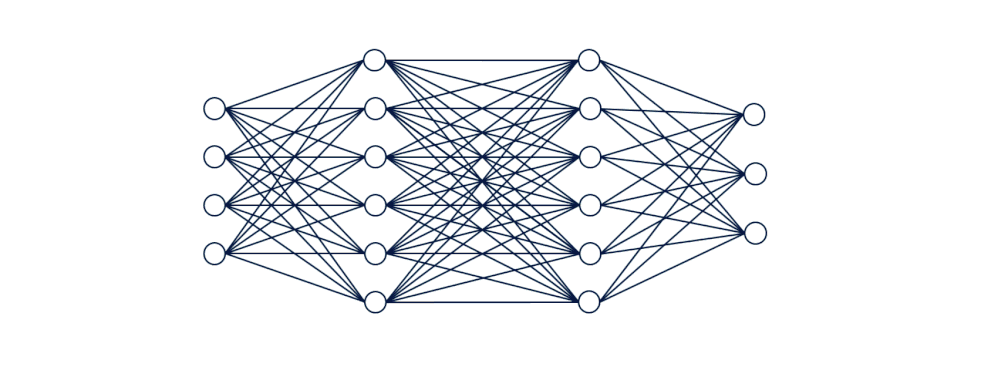

## **Separate Feature and Target**

In [ ]:
# Feature
X = df
# Target
Y = target

In [ ]:
# Bagi dataset 80% untuk training dan 20% untuk testing
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(452, 183) (361, 183) (91, 183)


## **Tensorflow and Keras**

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

## **Setting Layer**

In [ ]:
model = keras.Sequential([
    # Input layer
    keras.layers.Flatten(input_shape=(183,)),
    # Hidden layer, dengan fungsi aktivasi relu
    keras.layers.Dense(25, activation='relu'),
    # Hidden layer, dengan fungsi aktivasi relu
    keras.layers.Dense(25, activation='relu'),
    # Output layer
    keras.layers.Dense(3, activation='sigmoid')
])

## **Compiling Neural Network**

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## **Training Model**

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
11/11 [==============================] - 1s 22ms/step - loss: 0.8702 - accuracy: 0.5154 - val_loss: 0.7533 - val_accuracy: 0.6757
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7968 - accuracy: 0.6080 - val_loss: 0.6914 - val_accuracy: 0.7568
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7799 - accuracy: 0.6265 - val_loss: 0.6840 - val_accuracy: 0.7568
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7591 - accuracy: 0.6605 - val_loss: 0.6840 - val_accuracy: 0.7027
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7410 - accuracy: 0.6790 - val_loss: 0.6373 - val_accuracy: 0.8108
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7070 - accuracy: 0.6821 - val_loss: 0.6332 - val_accuracy: 0.7568
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.6944 - val_loss: 0.5957 - val_accuracy: 0.7838
Epoch 8/10
11/11 [=

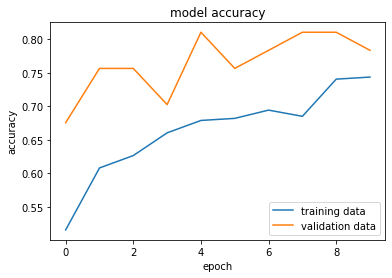

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

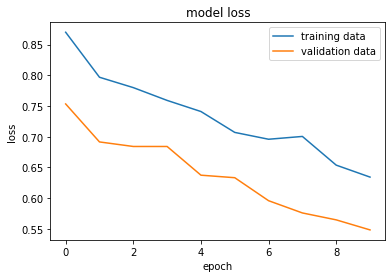

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.7492 - accuracy: 0.7143
0.7142857313156128


# **[4] RESULT ✅**

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

3/3 [==============================] - 0s 4ms/step


In [ ]:
index = 0
for data in Y_pred_labels:
  if data == 0:
    Y_pred_labels[index] = "Normal ECG"
  elif data == 1:
    Y_pred_labels[index] = "Different Classes of Arrhythmia"
  elif data == 2:
    Y_pred_labels[index] = "Unclassified"
  index +=1

X_test.reset_index(inplace=True)
prediction = {"Prediction": Y_pred_labels}
prediction = pd.DataFrame(prediction)

X_test["Prediction"] = prediction
X_test

,index,0,1,2,3,4,5,6,7,8,...,269,270,271,272,273,275,276,277,278,Prediction
0,207,0.7375,0.0,0.769231,0.571429,0.509434,0.289256,0.496241,0.521368,0.444444,...,0.472403,1.000000,0.595376,1.000000,0.0,0.090909,0.048387,0.502252,0.684449,Different Classes of Arrhythmia
1,383,0.5500,0.0,0.589744,0.662338,0.528302,0.322314,0.511278,0.401709,0.493827,...,0.473684,0.500000,0.543353,1.000000,0.0,0.636364,0.532258,0.550000,0.544835,Normal ECG
2,65,0.5125,1.0,0.230769,0.467532,0.358491,0.115702,0.466165,0.290598,0.259259,...,0.526316,1.000000,0.358382,1.000000,0.0,0.454545,0.483871,0.444643,0.441544,Normal ECG
3,197,0.5375,0.0,0.564103,0.402597,0.735849,0.677686,0.842105,0.333333,0.518519,...,0.421053,0.500000,0.641618,0.653846,0.0,0.454545,0.580645,0.558929,0.542565,Different Classes of Arrhythmia
4,208,0.4875,1.0,0.282051,0.467532,0.471698,0.049587,0.548872,0.504274,0.123457,...,0.472403,0.600000,1.000000,1.000000,0.0,0.454545,0.709677,0.892857,0.900114,Normal ECG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,292,0.4625,0.0,0.820513,0.610390,0.754717,0.512397,0.406015,0.811966,0.790123,...,0.631579,0.721018,0.601156,0.884615,0.0,0.727273,0.693548,0.598214,0.728717,Normal ECG
87,18,0.8750,0.0,0.487179,0.441558,0.566038,0.421488,0.684211,0.572650,0.395062,...,0.368421,1.000000,0.329480,1.000000,0.0,0.363636,0.387097,0.482143,0.425653,Different Classes of Arrhythmia
88,40,0.5000,1.0,0.282051,0.545455,0.358491,0.487603,0.616541,0.282051,0.407407,...,0.526316,1.000000,0.624277,0.711538,0.0,0.363636,0.612903,0.576786,0.584563,Different Classes of Arrhythmia
89,286,0.3750,1.0,0.358974,0.519481,0.415094,0.586777,0.601504,0.145299,0.395062,...,0.526316,1.000000,0.710983,1.000000,0.0,0.363636,0.483871,0.771429,0.639047,Normal ECG
